<a href="https://colab.research.google.com/github/Shai-vn/Social-Service-2023/blob/main/Preprocessing_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data (*Tweets*) preprocessing
After scraping the tweets. They need to be cleaning.
Deleting:

*   Mentions
*   links
* emoticons



In [ ]:
#import libraries
import pandas as pd
import os
import re
import nltk
import html
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

!pip install porter2stemmer
from porter2stemmer import Porter2Stemmer

nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

nltk.download('averaged_perceptron_tagger')
from nltk.corpus import wordnet

from nltk.tokenize import sent_tokenize, word_tokenize
!pip install html

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


  Preparing metadata (setup.py) ... done
  Created wheel for porter2stemmer: filename=porter2stemmer-1.0-py2.py3-none-any.whl size=6581 sha256=2958b64ea077afe35b0063b1c641f30646d0e2f794b83c39ebc4286cdcc87178
  Stored in directory: /root/.cache/pip/wheels/28/46/f7/1c4a25d4d59a86300e61cfd1522c99379140d15196b6b40281
Successfully built porter2stemmer


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#access to drive

from google.colab import drive
drive.mount("/content/drive")

pathDrive = "/content/drive/MyDrive/SentimentalAnalysis_SS/Data/chatGPT_tweets.csv"


Mounted at /content/drive


In [ ]:
# open file
data = pd.read_csv(pathDrive)
data.head(10)

,user_name,tweet_id,user_location,user_description,retweets,favorites,date,text,source,is_retweet
0,"Hammed A. Akande, M.Sc.",1.660000e+18,Canada,Founder & 1st National President @nsecnigeria|...,560,1717,2023-06-01 21:18:35+00:00,If you're a student and code heavily via Pytho...,Twitter for iPhone,False
1,Sayash Kapoor,1.670000e+18,Princeton,CS PhD student @PrincetonCITP. I study the soc...,236,804,2023-06-07 05:18:07+00:00,Every time I play around with prompt injection...,Twitter Web App,False
2,Angie Jones,1.670000e+18,"New Orleans, LA","VP, DevRel 🥑 | International Keynote Speaker ...",60,509,2023-06-05 15:54:47+00:00,Curious if there's been a decline in usage of ...,Twitter Web App,False
3,Raffi Melkonian,1.670000e+18,"Houston, TX","Appellate lawyer at Wright, Close & Barger in ...",30,473,2023-06-08 18:01:23+00:00,"If these people are buried, the use of ChatGPT...",Twitter Web App,False
4,Tim Kennedy,1.660000e+18,"Austin, TX","UFC Fighter, Ranger, sniper, and Special Force...",8,370,2023-06-02 02:58:33+00:00,Myself and two of my friends are currently in ...,Twitter for iPhone,False
5,Alon Farchy,1.670000e+18,"Houston, TX","Developing tools for Unity, and other things. ...",57,370,2023-06-08 13:04:39+00:00,I made a Unity UI Copilot to generate UI for m...,Twitter Web App,False
6,Brian Krassenstein,1.670000e+18,"Fort Myers, FL","Journalist, Tech Entrepreneur, Futurist - Figh...",65,361,2023-06-04 11:20:29+00:00,I've just returned from Magadonia where team M...,Twitter Web App,False
7,Liz Ann Sonders,1.660000e+18,"Naples, FL","Chief Investment Strategist, Charles Schwab & ...",18,325,2023-06-01 17:33:36+00:00,Played around with #ChatGPT recently and asked...,Twitter for iPad,False
8,Raffi Melkonian,1.670000e+18,"Houston, TX","Appellate lawyer at Wright, Close & Barger in ...",10,293,2023-06-08 18:02:17+00:00,Should they have used ChatGPT to begin with? N...,Twitter Web App,False
9,Alex Cohen,1.670000e+18,"Austin, TX",Day: Working @carbonhealth | Night: Building h...,26,265,2023-06-05 17:11:27+00:00,I think we may be the first healthcare company...,Twitter Web App,False


In [ ]:
data['text'][:15]

0     If you're a student and code heavily via Pytho...
1     Every time I play around with prompt injection...
2     Curious if there's been a decline in usage of ...
3     If these people are buried, the use of ChatGPT...
4     Myself and two of my friends are currently in ...
5     I made a Unity UI Copilot to generate UI for m...
6     I've just returned from Magadonia where team M...
7     Played around with #ChatGPT recently and asked...
8     Should they have used ChatGPT to begin with? N...
9     I think we may be the first healthcare company...
10    ChatGPT sucks at time-series problems.\n\nWhy?...
11    We asked ChatGPT to make our All-Time non-acti...
12    "Chatgpt with browsing" in only 20 lines of co...
13    Here are @kennedynation @kattimpf and @guypben...
14    "Hey ChatGPT, can you make the most liberal he...
Name: text, dtype: object

Deleting the duplicates columns

The tweets may be duplicated.

In [ ]:
new_data = data.drop_duplicates('text',keep='first')

In [ ]:
duplicates = data[data.duplicated]
duplicates_columns=duplicates.loc[:, duplicates.columns.duplicated()]

In [ ]:
#new_data = pd.DataFrame(new_data['text'])
new_data.to_csv(r'tweets_new_data.csv',index=False)
tweets_data = pd.read_csv('tweets_new_data.csv')
tweets = tweets_data.text
tweets

0       If you're a student and code heavily via Pytho...
1       Every time I play around with prompt injection...
2       Curious if there's been a decline in usage of ...
3       If these people are buried, the use of ChatGPT...
4       Myself and two of my friends are currently in ...
                              ...                        
7814    @PatriotCause1 It’s the face of the ChatGPT ro...
7815                               chatgpt my friend aled
7816    📡 Industry experts, agents &amp; innovators sh...
7817    Man sues OpenAI claiming ChatGPT 'hallucinatio...
7818    I just asked chatGPT and it said the answer is...
Name: text, Length: 7819, dtype: object

In [ ]:
#Tweets preprocessing
processed_tweets = []

#URL (links)
url = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
#Mentions
mentions = '@[\w\-]+'

#Hashtags
hashtag = '#[\w\-]+'

#Special characters
specialCharacter = r'\W'

#individual characters
individualCharacter =r'\s+[a-zA-Z]\s+'
individualCharacter_beggining= r'\^[a-zA-Z]\s+'

#spaces
spaces= r'\s+'
prefix_b = r'^b\s+'

#numbers
numbers = '[0-9]+'

#chatgpt
chat = '(\W|^)chat{0,1}\s{0,3}gpt{0,1}(\W|$)'

#guion
g = '_[\w\-]+'

Regular expression reference:


*   https://support.google.com/a/answer/1371417?hl=es#Match-Exact-Phrase-Only



In [ ]:

def cleanData(tweets):

  for tweet in tweets:
    clean_tweet = tweet.lower()  #Convertir a minúsculas
    clean_tweet = re.sub(mentions, ' ', clean_tweet)
    clean_tweet = re.sub(hashtag, ' ',clean_tweet )
    clean_tweet = re.sub(url, ' ', clean_tweet)
    clean_tweet = re.sub(specialCharacter, ' ',clean_tweet )
    clean_tweet = re.sub(individualCharacter, ' ', clean_tweet)
    clean_tweet = re.sub(individualCharacter_beggining, ' ', clean_tweet)
    clean_tweet = re.sub(prefix_b, '', clean_tweet)
    clean_tweet = re.sub(numbers, ' ', clean_tweet)
    clean_tweet = re.sub(" rt | amp ", ' ', clean_tweet)
    clean_tweet = re.sub(chat, '', clean_tweet)
    clean_tweet = re.sub(g, '', clean_tweet)
    clean_tweet = re.sub(spaces,' ', clean_tweet, flags=re.I)


    processed_tweets.append(clean_tweet)   #agregar a la lista de tweets proces
  return processed_tweets


In [ ]:
processed_tweets = cleanData(tweets)
processed_tweets

['if you re student and code heavily via python instead of usingfor your code download visual studio ',
 'every time play around with prompt injection come away surprised that ms and others continue to add llm plugin ',
 'curious if there been decline in usage of stackoverflow with the rise of',
 'if these people are buried the use ofwill not be the cause the cause will be not immediately apologizing ',
 'myself and two of my friends are currently in an debate all three of us are nearly exclusively usingto fo ',
 'i made unity ui copilot to generate ui for my game now can build ui withlike conversation what do yo ',
 'i ve just returned from magadonia where team maga plots their takeover of the world here is campaign sign st ',
 'played around with recently and asked for it to create bio of me lots of bio stuff on me in public domain ',
 'should they have usedto begin with no that ridiculous but it was fixable ridiculous mistake the ',
 'i think we may be the first healthcare company t

In [ ]:
df_tweets = pd.DataFrame(processed_tweets)
df_tweets.columns=['tweet']

df_tweets

,tweet
0,if you re student and code heavily via python ...
1,every time play around with prompt injection c...
2,curious if there been decline in usage of stac...
3,if these people are buried the use ofwill not ...
4,myself and two of my friends are currently in ...
...,...
7814,it the face of therobot now we know what the ...
7815,my friend aled
7816,industry experts agents innovators share thei...
7817,man sues openai claiming hallucination said he...


# Deleting StopWords

In [ ]:
stop_words = stopwords.words('english')
df_tweets['tweet'] = df_tweets['tweet'].apply(lambda x: ' '.join([word for word in x.split()
  if word not in (stop_words)]))

In [ ]:
df_tweets

,tweet
0,student code heavily via python instead usingf...
1,every time play around prompt injection come a...
2,curious decline usage stackoverflow rise
3,people buried use ofwill cause cause immediate...
4,two friends currently debate three us nearly e...
...,...
7814,face therobot know robot looks like
7815,friend aled
7816,industry experts agents innovators share knowl...
7817,man sues openai claiming hallucination said em...


In [ ]:
df_tweets

,tweet
0,student code heavily via python instead usingf...
1,every time play around prompt injection come a...
2,curious decline usage stackoverflow rise
3,people buried use ofwill cause cause immediate...
4,two friends currently debate three us nearly e...
...,...
7814,face therobot know robot looks like
7815,friend aled
7816,industry experts agents innovators share knowl...
7817,man sues openai claiming hallucination said em...


msjsReference: https://www.datasnips.com/58/remove-stop-words-from-text-in-dataframe-column/

In [ ]:

#tweets_df = pd.read_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/clean_tweets.csv', header=None)
print(df_tweets.isna().value_counts())
#Droping the empty rows
tweets_df = df_tweets.dropna()
#Saving it to the csv file
#tweets_df.to_csv('modified_cleanTweets.csv',index=False)
#tweets_df.to_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/modified_cleanTweets_chatgpt.csv', header=False, index=False)

tweet
False    7819
dtype: int64


# Steming

In [ ]:
df_tweets['tokenized_tweets'] = df_tweets.apply(lambda row: nltk.word_tokenize(row['tweet']), axis=1)

In [ ]:
df_tweets

,tweet,tokenized_tweets
0,student code heavily via python instead usingf...,"[student, code, heavily, via, python, instead,..."
1,every time play around prompt injection come a...,"[every, time, play, around, prompt, injection,..."
2,curious decline usage stackoverflow rise,"[curious, decline, usage, stackoverflow, rise]"
3,people buried use ofwill cause cause immediate...,"[people, buried, use, ofwill, cause, cause, im..."
4,two friends currently debate three us nearly e...,"[two, friends, currently, debate, three, us, n..."
...,...,...
7814,face therobot know robot looks like,"[face, therobot, know, robot, looks, like]"
7815,friend aled,"[friend, aled]"
7816,industry experts agents innovators share knowl...,"[industry, experts, agents, innovators, share,..."
7817,man sues openai claiming hallucination said em...,"[man, sues, openai, claiming, hallucination, s..."


In [ ]:
#Saving clean dataset
df_tweets.to_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/clean_tweets_chatgpt_token.csv', header=False, index=False)

Uso de librería tokenizers de *Spacy* para la tokenización

In [ ]:
!pip install spacy

In [ ]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()
tokenizer = Tokenizer(nlp.vocab)

In [ ]:
df_tweets['tokenized_tweets_spacy'] = df_tweets.apply(lambda row:tokenizer(row['tweet']), axis=1)

In [ ]:
words = df_tweets['tokenized_tweets']
#words.to_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/tokenized_tweets.csv', header=False, index=False)

In [ ]:
df_tweets

,tweet,tokenized_tweets,tokenized_tweets_spacy
0,student code heavily via python instead usingf...,"[student, code, heavily, via, python, instead,...","(student, code, heavily, via, python, instead,..."
1,every time play around prompt injection come a...,"[every, time, play, around, prompt, injection,...","(every, time, play, around, prompt, injection,..."
2,curious decline usage stackoverflow rise,"[curious, decline, usage, stackoverflow, rise]","(curious, decline, usage, stackoverflow, rise)"
3,people buried use ofwill cause cause immediate...,"[people, buried, use, ofwill, cause, cause, im...","(people, buried, use, ofwill, cause, cause, im..."
4,two friends currently debate three us nearly e...,"[two, friends, currently, debate, three, us, n...","(two, friends, currently, debate, three, us, n..."
...,...,...,...
7814,face therobot know robot looks like,"[face, therobot, know, robot, looks, like]","(face, therobot, know, robot, looks, like)"
7815,friend aled,"[friend, aled]","(friend, aled)"
7816,industry experts agents innovators share knowl...,"[industry, experts, agents, innovators, share,...","(industry, experts, agents, innovators, share,..."
7817,man sues openai claiming hallucination said em...,"[man, sues, openai, claiming, hallucination, s...","(man, sues, openai, claiming, hallucination, s..."


In [ ]:
words

0       [student, code, heavily, via, python, instead,...
1       [every, time, play, around, prompt, injection,...
2          [curious, decline, usage, stackoverflow, rise]
3       [people, buried, use, ofwill, cause, cause, im...
4       [two, friends, currently, debate, three, us, n...
                              ...                        
7814           [face, therobot, know, robot, looks, like]
7815                                       [friend, aled]
7816    [industry, experts, agents, innovators, share,...
7817    [man, sues, openai, claiming, hallucination, s...
7818         [askedand, said, answer, fuck, ass, tonight]
Name: tokenized_tweets, Length: 7819, dtype: object

In [ ]:
words.describe()

count     7819
unique    7166
top         []
freq        99
Name: tokenized_tweets, dtype: object

In [ ]:
#Delete brackets
import re

def delete_brackets(list_w):

  new_list = []
  for palabra in list_w:
    new = re.sub("[\\[]", "", palabra)
    new.append(new)

  return new_list

In [ ]:
from nltk.stem import PorterStemmer

def apply_stemming_to_list(word_list):
    # Inicializar el stemmer (en este caso, el PorterStemmer)
    stemmer = PorterStemmer()

    # Aplicar stemming a cada palabra y almacenar el resultado en una lista
    stemmed_words = [stemmer.stem(word) for word in word_list]

    return stemmed_words

In [ ]:

tweets_for_analysis = df_tweets['tokenized_tweets']
tweets_for_analysis
type(tweets_for_analysis[0])




list

#Porter Stemming


In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [ ]:
tweets_for_analysis = tweets_for_analysis.apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
tweets_for_analysis = tweets_for_analysis.drop(columns=['unstemmed']) # Get rid of the unstemmed column.
tweets_for_analysis # Print dataframe.

0       [student, code, heavili, via, python, instead,...
1       [everi, time, play, around, prompt, inject, co...
2             [curiou, declin, usag, stackoverflow, rise]
3       [peopl, buri, use, ofwil, caus, caus, immedi, ...
4       [two, friend, current, debat, three, us, nearl...
                              ...                        
7814            [face, therobot, know, robot, look, like]
7815                                        [friend, ale]
7816    [industri, expert, agent, innov, share, knowle...
7817    [man, sue, openai, claim, hallucin, said, embe...
7818         [askedand, said, answer, fuck, ass, tonight]
Name: tokenized_tweets, Length: 7819, dtype: object

In [ ]:
df_tweets['tweets_stemming'] = tweets_for_analysis

In [ ]:
df_tweets.head()

,tweet,tokenized_tweets,tweets_stemming
0,student code heavily via python instead usingf...,"[student, code, heavily, via, python, instead,...","[student, code, heavili, via, python, instead,..."
1,every time play around prompt injection come a...,"[every, time, play, around, prompt, injection,...","[everi, time, play, around, prompt, inject, co..."
2,curious decline usage stackoverflow rise,"[curious, decline, usage, stackoverflow, rise]","[curiou, declin, usag, stackoverflow, rise]"
3,people buried use ofwill cause cause immediate...,"[people, buried, use, ofwill, cause, cause, im...","[peopl, buri, use, ofwil, caus, caus, immedi, ..."
4,two friends currently debate three us nearly e...,"[two, friends, currently, debate, three, us, n...","[two, friend, current, debat, three, us, nearl..."


In [ ]:
df_tweets.to_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/tweets_with_stemming.csv',index=False)

After cleaning the data, I create a list with all the words in the tweets.

In [ ]:
#List of words
word_list = []
for w in words:
  word_list.extend(w)

In [ ]:
word_list

['student',
 'code',
 'heavily',
 'via',
 'python',
 'instead',
 'usingfor',
 'code',
 'download',
 'visual',
 'studio',
 'every',
 'time',
 'play',
 'around',
 'prompt',
 'injection',
 'come',
 'away',
 'surprised',
 'ms',
 'others',
 'continue',
 'add',
 'llm',
 'plugin',
 'curious',
 'decline',
 'usage',
 'stackoverflow',
 'rise',
 'people',
 'buried',
 'use',
 'ofwill',
 'cause',
 'cause',
 'immediately',
 'apologizing',
 'two',
 'friends',
 'currently',
 'debate',
 'three',
 'us',
 'nearly',
 'exclusively',
 'usingto',
 'fo',
 'made',
 'unity',
 'ui',
 'copilot',
 'generate',
 'ui',
 'game',
 'build',
 'ui',
 'withlike',
 'conversation',
 'yo',
 'returned',
 'magadonia',
 'team',
 'maga',
 'plots',
 'takeover',
 'world',
 'campaign',
 'sign',
 'st',
 'played',
 'around',
 'recently',
 'asked',
 'create',
 'bio',
 'lots',
 'bio',
 'stuff',
 'public',
 'domain',
 'usedto',
 'begin',
 'ridiculous',
 'fixable',
 'ridiculous',
 'mistake',
 'think',
 'may',
 'first',
 'healthcare',
 'co

In [ ]:
type(word_list)

list

In [ ]:
# Calcular la frecuencia de las palabras
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
freq_dist = FreqDist(word_list)
freq_dist

FreqDist({'ai': 1402, 'like': 377, 'use': 351, 'new': 290, 'using': 262, 'write': 229, 'one': 206, 'help': 191, 'know': 180, 'tools': 179, ...})

<ipython-input-59-3b96dcdef8a9>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax, palette="Paired")


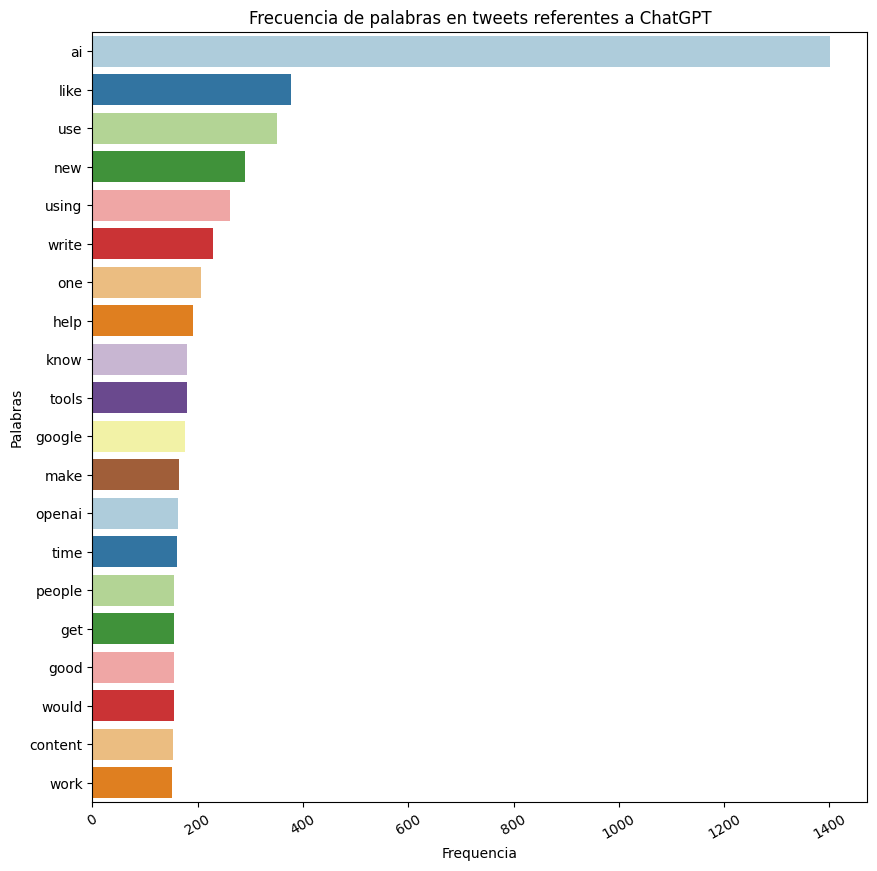

In [ ]:
#Gráfica de frecuencia de palabras
import seaborn as sns

## Solo mostrara la frecuencia de las 20 palabras frecuentes
all_fdist = FreqDist(freq_dist).most_common(20)

## Conversion a pandas series
all_fdist = pd.Series(dict(all_fdist))

fig, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.values, y=all_fdist.index, ax=ax, palette="Paired")
plt.xlabel('Frequencia')
plt.ylabel('Palabras')
plt.title('Frecuencia de palabras en tweets referentes a ChatGPT')
plt.xticks(rotation=30);


In [ ]:
words_df = pd.DataFrame(word_list)
word_counts = words_df[0].value_counts()
word_counts

ai             1402
like            377
use             351
new             290
using           262
               ... 
wings             1
buffalo           1
addedto           1
banningwill       1
aled              1
Name: 0, Length: 12299, dtype: int64

# Counting the frequency of words
Now, I'm going to count the frequency of words with Collections.

In [ ]:
from collections import Counter

word_counts = Counter(word_list)
word_counts

Counter({'student': 22,
         'code': 127,
         'heavily': 4,
         'via': 124,
         'python': 20,
         'instead': 26,
         'usingfor': 25,
         'download': 11,
         'visual': 10,
         'studio': 3,
         'every': 67,
         'time': 161,
         'play': 28,
         'around': 51,
         'prompt': 112,
         'injection': 4,
         'come': 45,
         'away': 25,
         'surprised': 7,
         'ms': 4,
         'others': 18,
         'continue': 13,
         'add': 24,
         'llm': 29,
         'plugin': 63,
         'curious': 27,
         'decline': 2,
         'usage': 6,
         'stackoverflow': 8,
         'rise': 37,
         'people': 155,
         'buried': 1,
         'use': 351,
         'ofwill': 2,
         'cause': 10,
         'immediately': 8,
         'apologizing': 2,
         'two': 50,
         'friends': 13,
         'currently': 21,
         'debate': 7,
         'three': 18,
         'us': 131,
         'nearly':

In [ ]:
len(word_list)


59717

In [ ]:
sorted_words = word_counts.most_common()
sw = sorted_words[:20]
type(sw)

list

We going to know the places with most tweets about Chatgpt with matplot graphics

In [ ]:
from nltk.stem import PorterStemmer

def apply_stemming_to_list(word_list):
    # Inicializar el stemmer (en este caso, el PorterStemmer)
    stemmer = PorterStemmer()

    # Aplicar stemming a cada palabra y almacenar el resultado en una lista
    stemmed_words = [stemmer.stem(word) for word in word_list]

    return stemmed_words


In [ ]:
words = apply_stemming_to_list(word_list)
print(words)

NameError: ignored

In [ ]:
words = pd.DataFrame(words)
#words.to_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/words.csv', header=False, index=False)

In [ ]:
#words.to_string('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/words.txt')

In [ ]:
words.columns = ['word']


In [ ]:
#words.to_csv('/content/drive/MyDrive/SentimentalAnalysis_SS/Data/Preprocessing/word_list.txt', index=False, header=False, columns=['word'])